# Dataset  gender-classification

Download from kaggle -> https://www.kaggle.com/cashutosh/gender-classification-dataset?

Content
The data set is of cropped images of male and female . It is split into training and validation directory. Training contains ~23,000 images of each class and validation directory contains ~5,500 images of each class.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

os.listdir('../input/gender-classification-dataset/Training')

['male', 'female']

In [5]:
os.listdir('../input/gender-classification-dataset/Training/male')[0]

'171476.jpg.jpg'

# Image

In [6]:
from matplotlib.image import imread

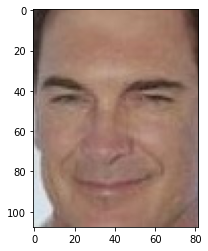

In [7]:
male = ('../input/gender-classification-dataset/Training/male/'+'130292.jpg.jpg')

plt.imshow(imread(male))
plt.show()

In [8]:
os.listdir('../input/gender-classification-dataset/Training/female')[0]

'132894.jpg.jpg'

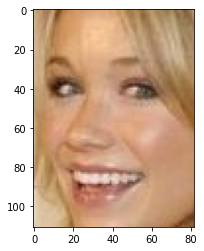

In [9]:
female = ('../input/gender-classification-dataset/Training/female/'+'154224.jpg.jpg')

plt.imshow(imread(female))
plt.show()

In [10]:
dim1 = []
dim2 = []

for image_filename in os.listdir('../input/gender-classification-dataset/Training/female'):
    
    img = imread('../input/gender-classification-dataset/Training/female/'+ image_filename)
    
    d1,d2,color = img.shape
    
    dim1.append(d1)
    dim2.append(d2)
    

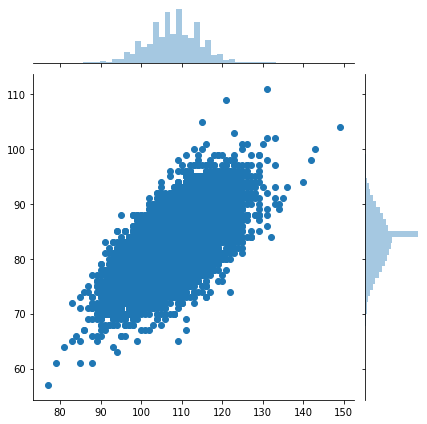

In [11]:
sns.jointplot(dim1,dim2)
plt.show()

In [12]:
np.mean(dim1) , np.mean(dim2)

(108.04629350772275, 83.0932753947425)

In [13]:
color

3

In [14]:
image_shape = (108,83,3)

# Data Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:

image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              rescale=1/255)

In [17]:
image_gen.flow_from_directory('../input/gender-classification-dataset/Training')

Found 47009 images belonging to 2 classes.


In [18]:
image_gen.flow_from_directory('../input/gender-classification-dataset/Validation')

Found 11649 images belonging to 2 classes.


# Training

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 81, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 8, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 5632)              0

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
batch_size = 16

In [24]:
train_image_gen = image_gen.flow_from_directory('../input/gender-classification-dataset/Training',
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 47009 images belonging to 2 classes.


In [25]:
val_image_gen = image_gen.flow_from_directory('../input/gender-classification-dataset/Validation',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 11649 images belonging to 2 classes.


In [26]:
train_image_gen.class_indices

{'female': 0, 'male': 1}

In [27]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=val_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
2939/2939 [==============================] - 274s 93ms/step - loss: 0.4006 - accuracy: 0.8144 - val_loss: 0.2214 - val_accuracy: 0.9148
Epoch 2/20
2939/2939 [==============================] - 221s 75ms/step - loss: 0.2263 - accuracy: 0.9153 - val_loss: 0.2124 - val_accuracy: 0.9134
Epoch 3/20
2939/2939 [==============================] - 213s 72ms/step - loss: 0.1893 - accuracy: 0.9298 - val_loss: 0.1698 - val_accuracy: 0.9372
Epoch 4/20
2939/2939 [==============================] - 220s 75ms/step - loss: 0.1784 - accuracy: 0.9344 - val_loss: 0.1490 - val_accuracy: 0.9484
Epoch 5/20
2939/2939 [==============================] - 223s 76ms/step - loss: 0.1669 - accuracy: 0.9389 - val_loss: 0.1548 - val_accuracy: 0.9398
Epoch 6/20
2939/2939 [==============================] - 217s 74ms/step - loss: 0.1610 - accuracy: 0.9425 - val_loss: 0.1363 - val_accuracy: 0.9509
Epoch 7/20
2939/2939 [==============================] - 217s 74ms/step - loss: 0.1541 - accuracy: 0.9446 - val_loss: 0

In [28]:
from tensorflow.keras.models import load_model
model.save('Gender.h5')

# Model Evaluating

In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.400587,0.814440,0.221443,0.914757
1,0.226254,0.915335,0.212378,0.913383
2,0.189303,0.929801,0.169783,0.937162
3,0.178366,0.934353,0.148984,0.948408
4,0.166895,0.938863,0.154822,0.939823
5,0.161043,0.942522,0.136308,0.950897
6,0.154105,0.944628,0.128598,0.954932
7,0.151660,0.945734,0.137241,0.950039
8,0.149479,0.947053,0.116909,0.959052
9,0.142567,0.949201,0.113814,0.960168


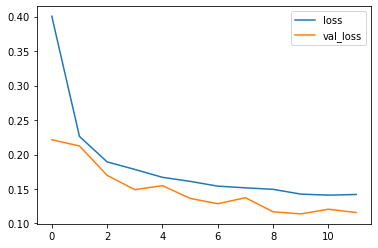

In [32]:
metrics[['loss','val_loss']].plot()
plt.show()

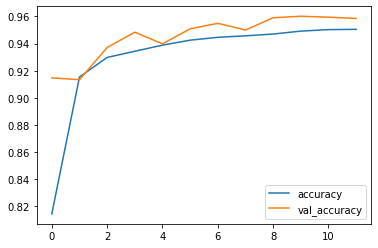

In [33]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

# Prediction

In [34]:
model.evaluate_generator(val_image_gen)

[0.11540281772613525, 0.958880603313446]

In [36]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(val_image_gen)

In [37]:
pred_probabilities

array([[2.0821800e-03],
       [5.3063918e-09],
       [5.6176807e-04],
       ...,
       [9.9833602e-01],
       [9.9991918e-01],
       [9.9999988e-01]], dtype=float32)

In [38]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [39]:
predictions = pred_probabilities > 0.5

In [40]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5841
           1       0.96      0.96      0.96      5808

    accuracy                           0.96     11649
   macro avg       0.96      0.96      0.96     11649
weighted avg       0.96      0.96      0.96     11649



In [43]:
confusion_matrix(val_image_gen.classes,predictions)

array([[5602,  239],
       [ 230, 5578]])

# Checking Model

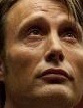

In [44]:
img = '../input/gender-classification-dataset/Validation/male/063453.jpg.jpg'

my_image = image.load_img(img,target_size=image_shape)

my_image

In [45]:
type(my_image)

PIL.Image.Image

In [46]:
my_image = image.img_to_array(my_image)
type(my_image)

numpy.ndarray

In [47]:
my_image.shape

(108, 83, 3)

In [48]:
my_image = np.expand_dims(my_image, axis=0)

In [49]:
my_image.shape

(1, 108, 83, 3)

In [50]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [ ]:
val_image_gen.class_indices

# Well Done We Get 96% Accuracy !!!